In [1]:
#pip installed all modules to my desktop
import sep
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

In [2]:
rcParams['figure.figsize'] = [10., 8.]

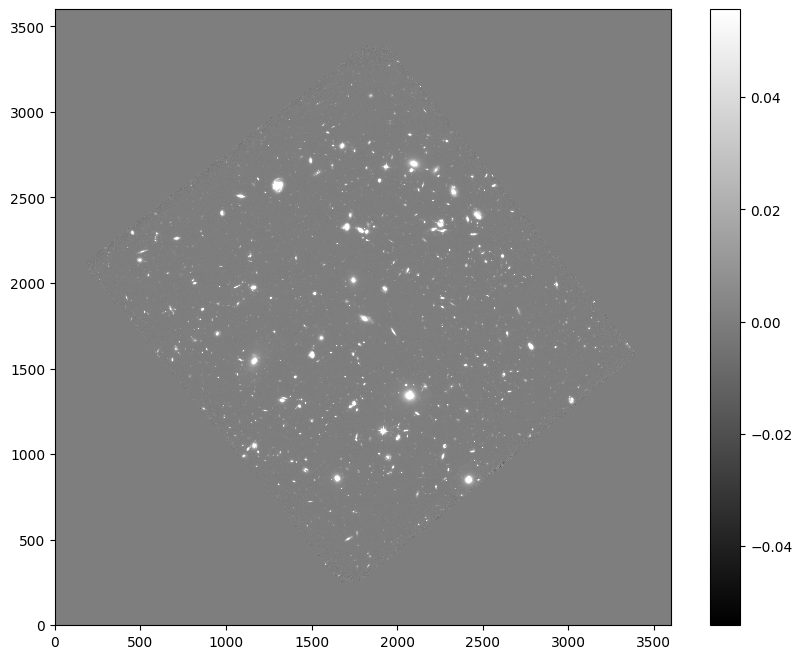

In [5]:
data = fits.open("/Users/kaitlyn/Desktop/School/Winter_2024/Coding/Final/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz (1).fits")
image_data = data[0].data
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('img21.png')
plt.show()

In [6]:
with fits.open("/Users/kaitlyn/Desktop/School/Winter_2024/Coding/Final/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz (1).fits") as hdul:
    image_data = hdul[0].data
m, s = np.mean(image_data), np.std(image_data)

In [7]:
with fits.open("/Users/kaitlyn/Desktop/School/Winter_2024/Coding/Final/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz (1).fits") as hdul:
    image_data = hdul[0].data
    image_data = image_data.byteswap().newbyteorder()
    bkg = sep.Background(image_data)

In [8]:
with fits.open("/Users/kaitlyn/Desktop/School/Winter_2024/Coding/Final/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz (1).fits") as hdul:
    data = hdul[0].data
    data = data.byteswap().newbyteorder()
    mask = np.ones_like(data, dtype=bool)
    bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

In [9]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
1.0


In [10]:
bkg_image = bkg.back()

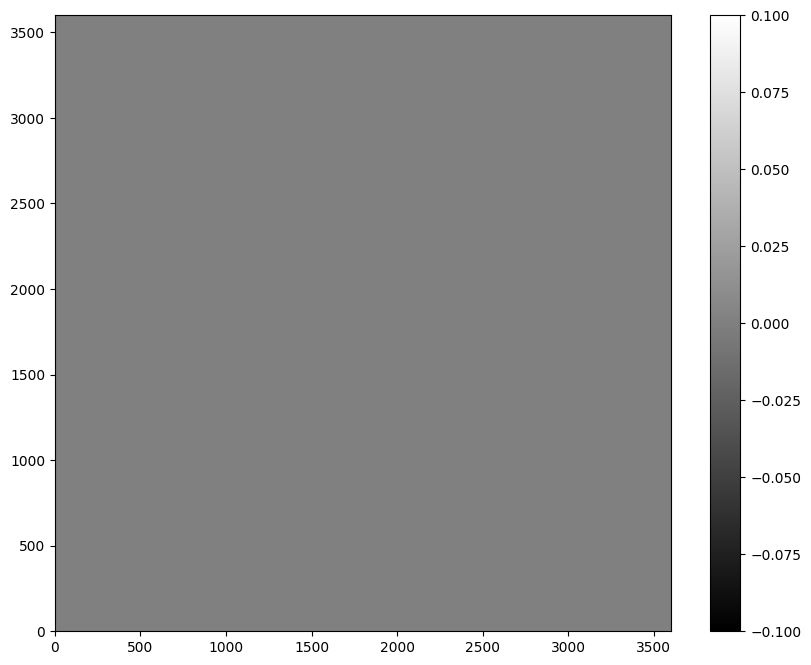

In [11]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('img22.png')
plt.colorbar();

In [12]:
bkg_rms = bkg.rms()

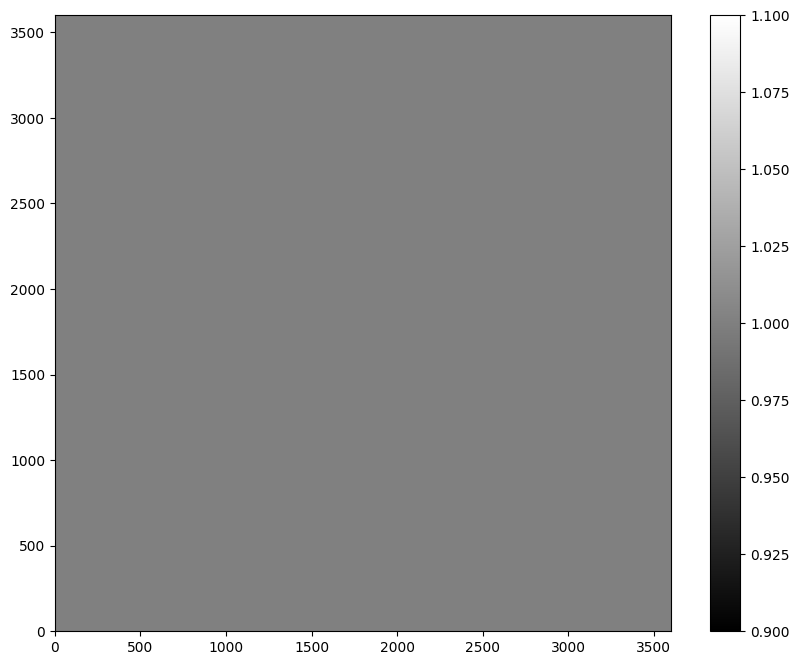

In [13]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('img23.png')
plt.colorbar();

In [14]:
data_sub = data - bkg

In [15]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [16]:
len(objects)

12

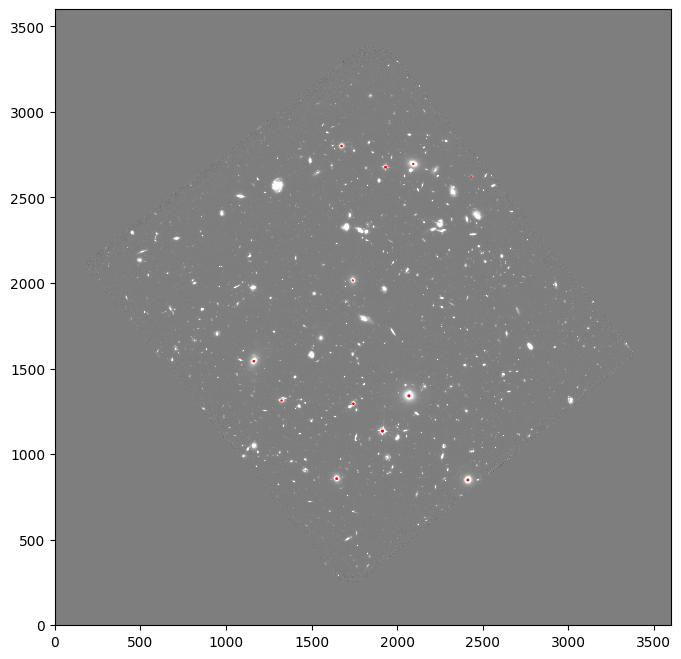

In [18]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('img24.png')
plt.show()

In [19]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [106]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [107]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 65.561095 +/- 9.683031
object 1: flux = 72.403221 +/- 10.038089
object 2: flux = 806.281391 +/- 28.886007
object 3: flux = 51.826306 +/- 8.945742
object 4: flux = 45.700085 +/- 8.603493
object 5: flux = 77.673022 +/- 10.285573
object 6: flux = 56.550116 +/- 9.205983
object 7: flux = 35.792712 +/- 8.004543
object 8: flux = 30.035610 +/- 7.636466
object 9: flux = 214.400030 +/- 15.582042


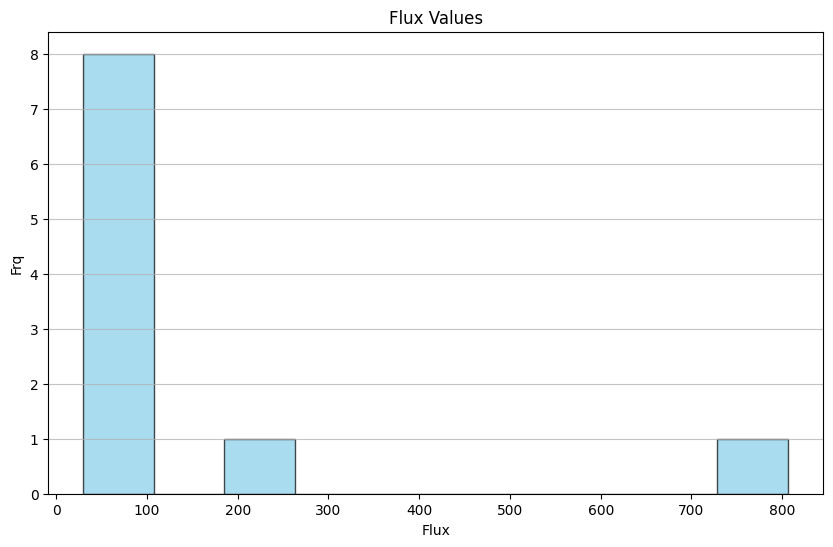

In [21]:
flux_values = [65.561095, 72.403221, 806.281391, 51.826306, 45.700085,
               77.673022, 56.550116, 35.792712, 30.035610, 214.400030]
plt.figure(figsize=(10, 6))
plt.hist(flux_values, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Flux')
plt.ylabel('Frq')
plt.title('Flux Values')
plt.grid(axis='y', alpha=0.75)
plt.savefig('img25.png')
plt.show()

In [23]:
mean_flux = np.mean(flux_values)
median_flux = np.median(flux_values)
std_flux = np.std(flux_values)
print("Mean:", mean_flux)
print("Median:", median_flux)
print("Standard deviation:", std_flux)
outlier_index = np.argmax(flux_values)
outlier_flux = flux_values[outlier_index]
outlier_std = (outlier_flux - mean_flux) / std_flux
print("Outlier:", outlier_index)
print("Standard deviations from the mean:", outlier_std)

Mean: 145.62235879999997
Median: 61.0556055
Standard deviation: 225.77146806674577
Outlier: 2
Standard deviations from the mean: 2.926229066308266
